# <b><center><i> PREDICTING HOUSE PRICES

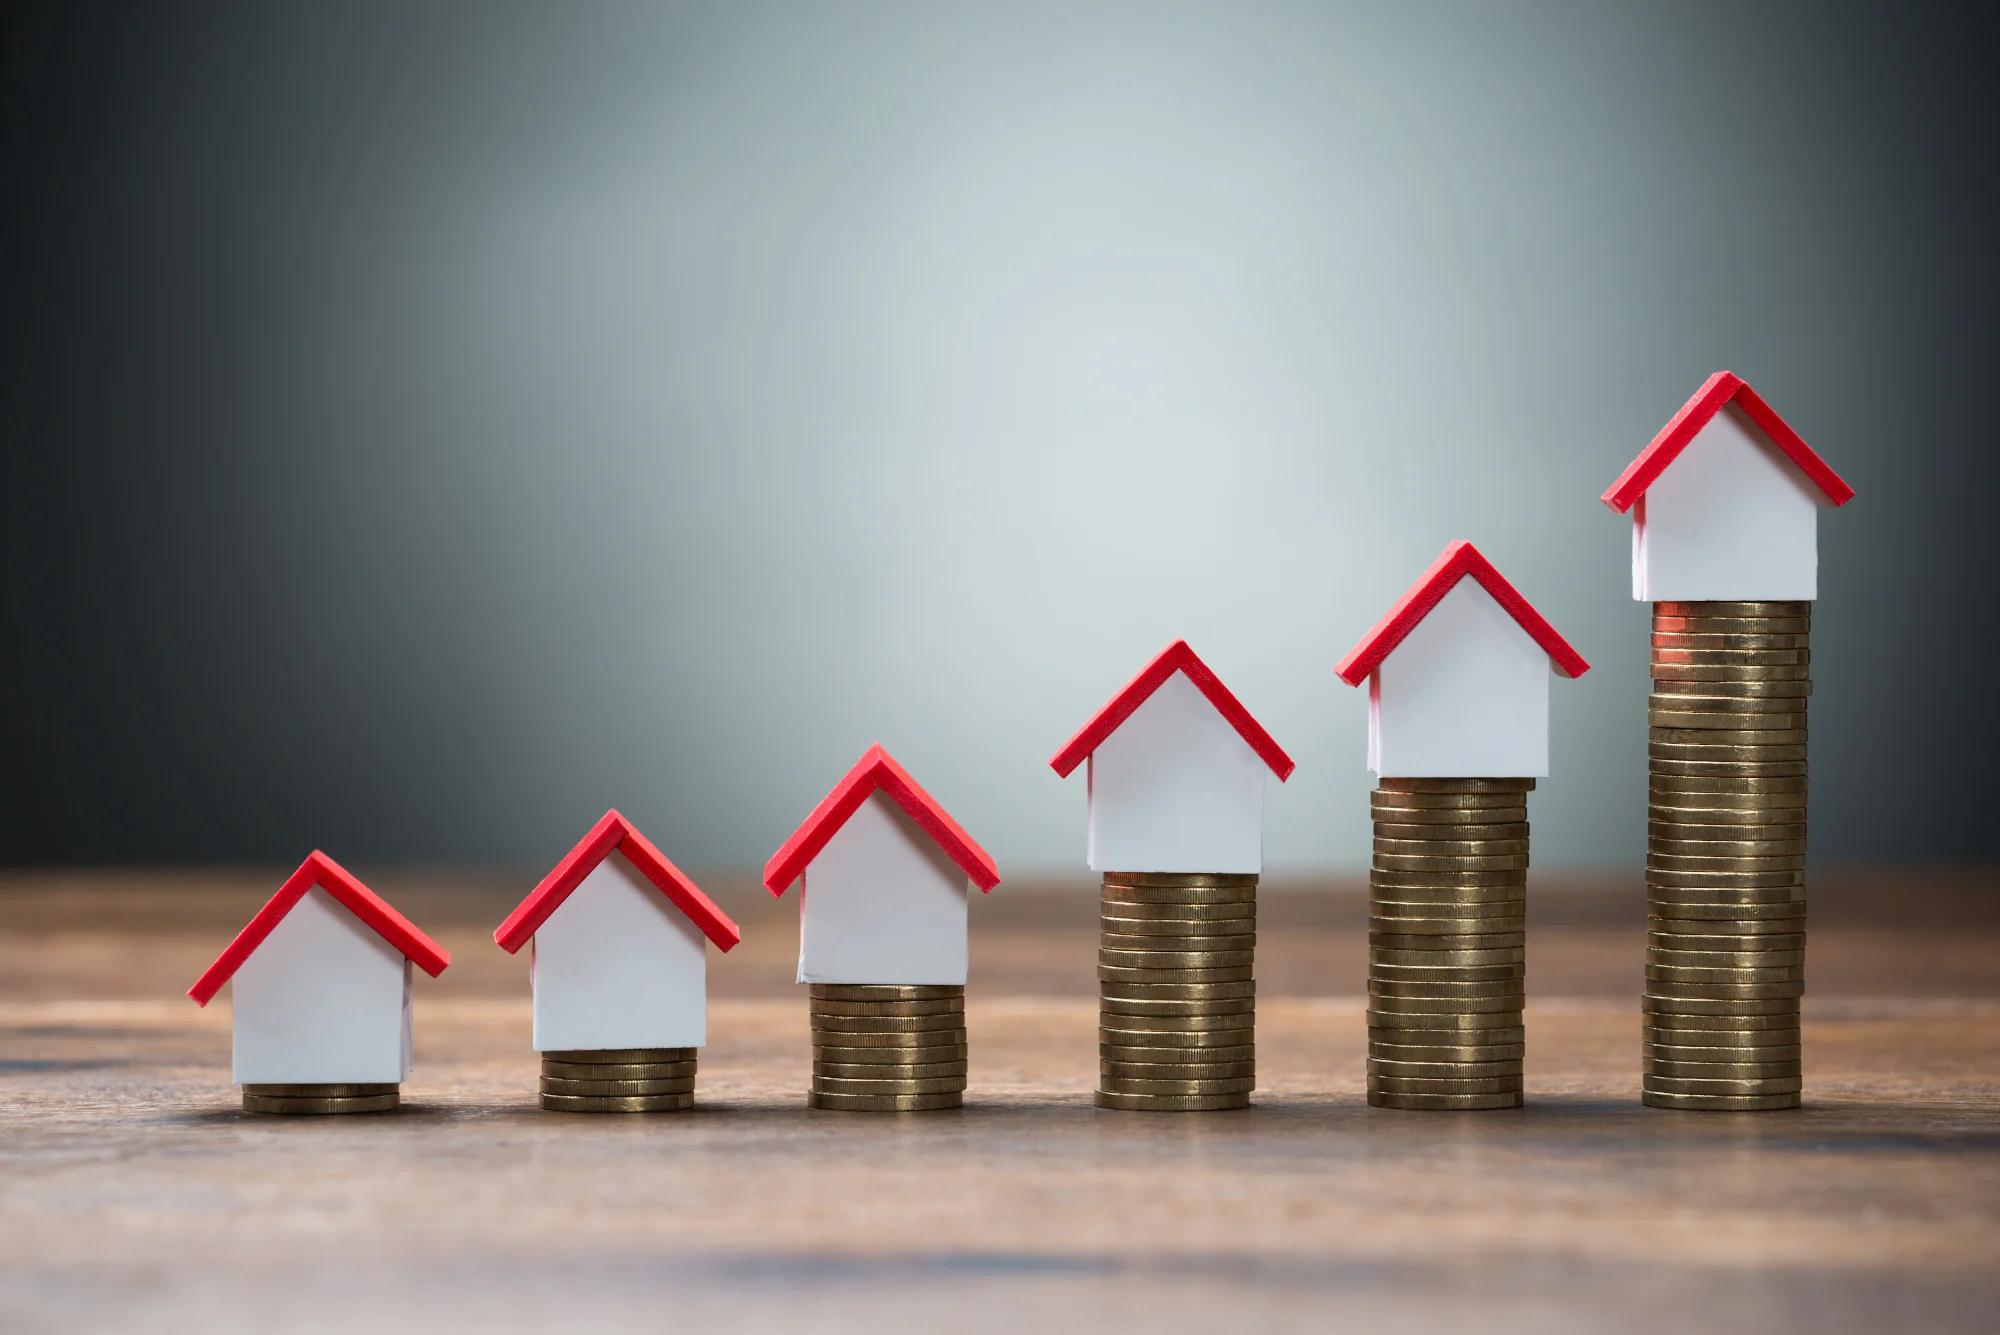

# <b><center><i> IMPORTING LIBRARIES

In [553]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

sns.set(style='whitegrid')
sns.color_palette("rocket", as_cmap=True)
%matplotlib inline

# <b><center><i> LOADING DATASET

In [404]:
data = pd.read_csv("./Housing.csv");
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# <b><center><i> Exploratory Data Analysis (EDA)

In [407]:
data.shape

(545, 13)

In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [411]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [413]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [415]:
data[data.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [417]:
data = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'price']]

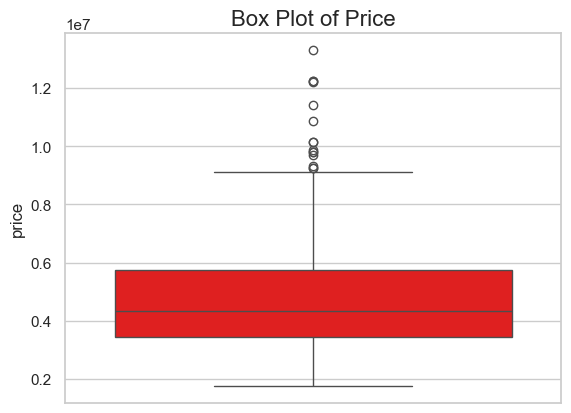

In [419]:
sns.boxplot(data=data, y='price', color='red')
plt.title("Box Plot of Price", fontsize=16)
plt.show()
# there are outliers in dataset

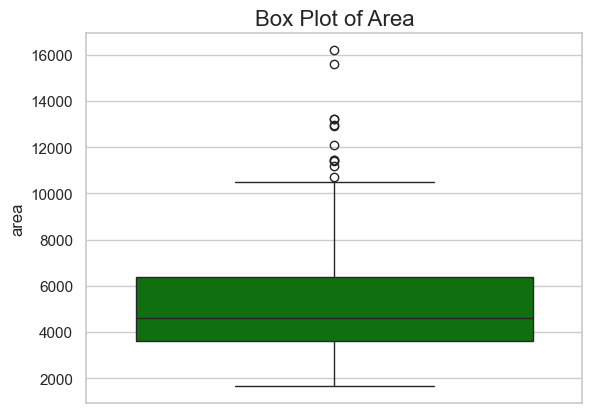

In [421]:
sns.boxplot(data=data, y='area', color='green')
plt.title("Box Plot of Area", fontsize=16)
plt.show()

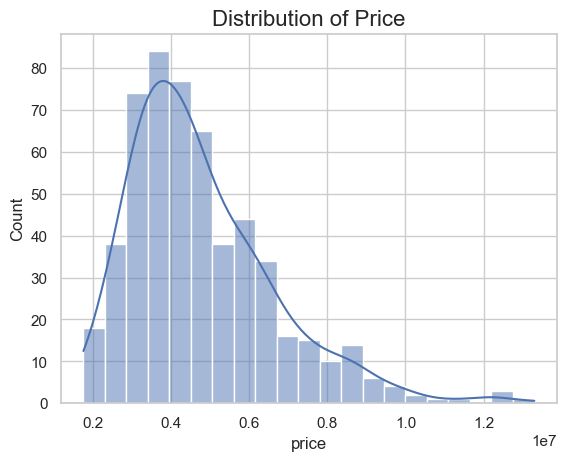

In [422]:
sns.histplot(data=data, x=data['price'], kde=True)
plt.title("Distribution of Price", fontsize=16)
plt.show()

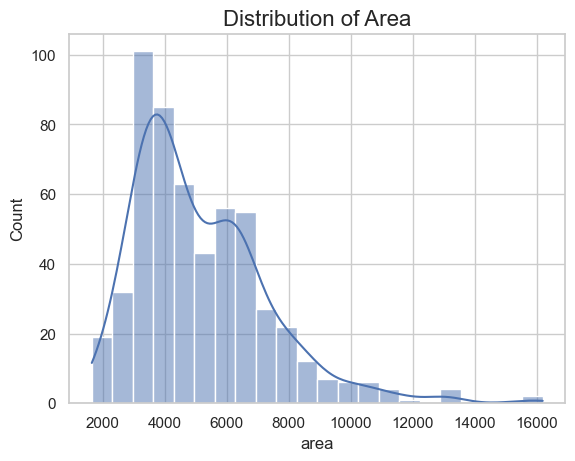

In [423]:
sns.histplot(data=data, x=data['area'], kde=True)
plt.title("Distribution of Area", fontsize=16)
plt.show()

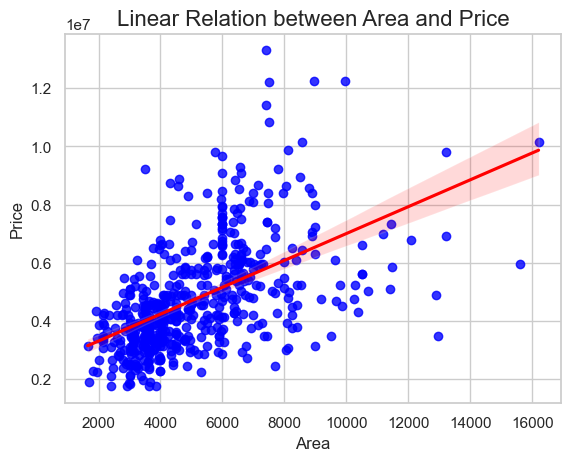

In [425]:
sns.regplot(data=data, x=data['area'], y=data['price'], scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Linear Relation between Area and Price", fontsize=16)
plt.xlabel('Area');plt.ylabel("Price");
plt.show()

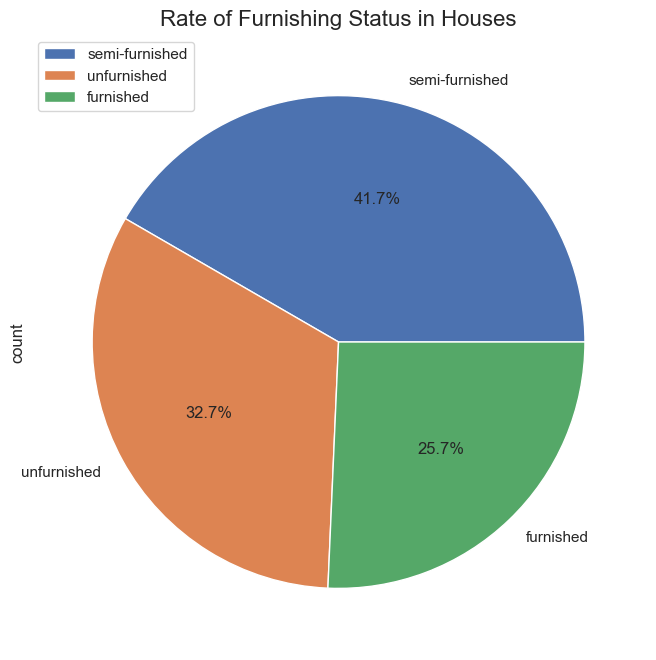

In [426]:
plt.figure(figsize=(10, 8))
data['furnishingstatus'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend()
plt.title("Rate of Furnishing Status in Houses", fontsize=16)
plt.show()

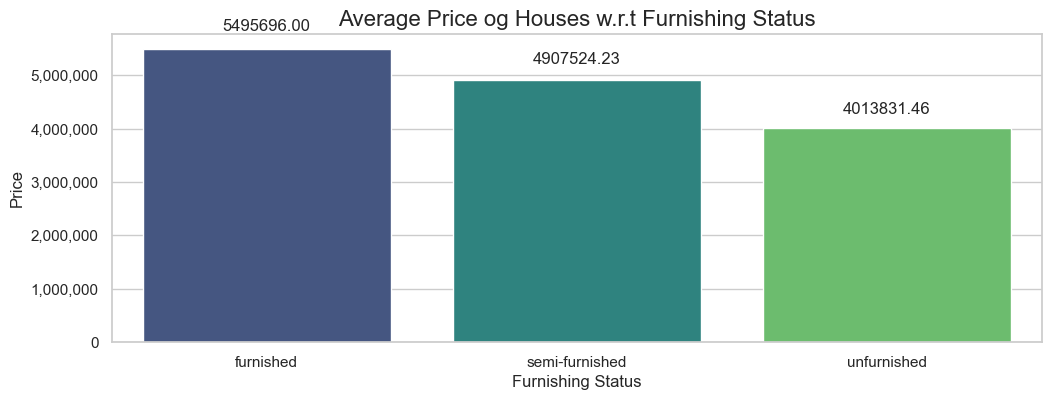

In [428]:
plt.figure(figsize=(12, 4))
avg_price_wrt_furnshingStatus = data.groupby("furnishingstatus")['price'].mean().reset_index()
sns.barplot(data=avg_price_wrt_furnshingStatus, x=avg_price_wrt_furnshingStatus['furnishingstatus'], y=avg_price_wrt_furnshingStatus['price'], palette='viridis', hue='furnishingstatus')

for i, price in enumerate(avg_price_wrt_furnshingStatus['price']):
    plt.text(i, price + 0.05 * price, f'{price:.2f}', ha='center', va='bottom')

plt.title("Average Price og Houses w.r.t Furnishing Status", fontsize=16)
plt.xlabel("Furnishing Status")
plt.ylabel("Price")

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

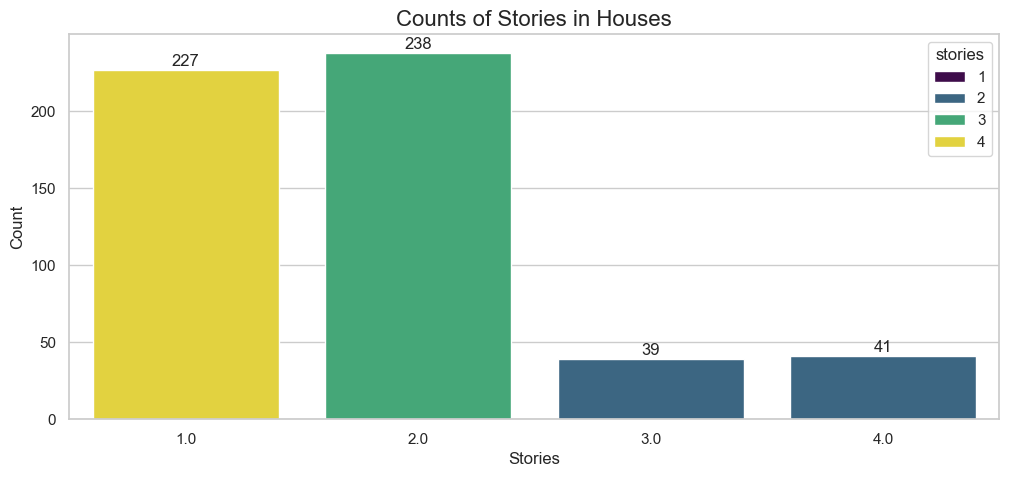

In [429]:
stories_counts = data['stories'].value_counts().reset_index().sort_values(by='stories')
plt.figure(figsize=(12, 5))
sns.barplot(data=stories_counts, x=stories_counts['stories'], y=stories_counts['count'], palette='viridis',hue=data['stories'])
for i, count in enumerate(stories_counts['count']):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
plt.title("Counts of Stories in Houses", fontsize=16)
plt.xlabel("Stories")
plt.ylabel("Count")
plt.show()

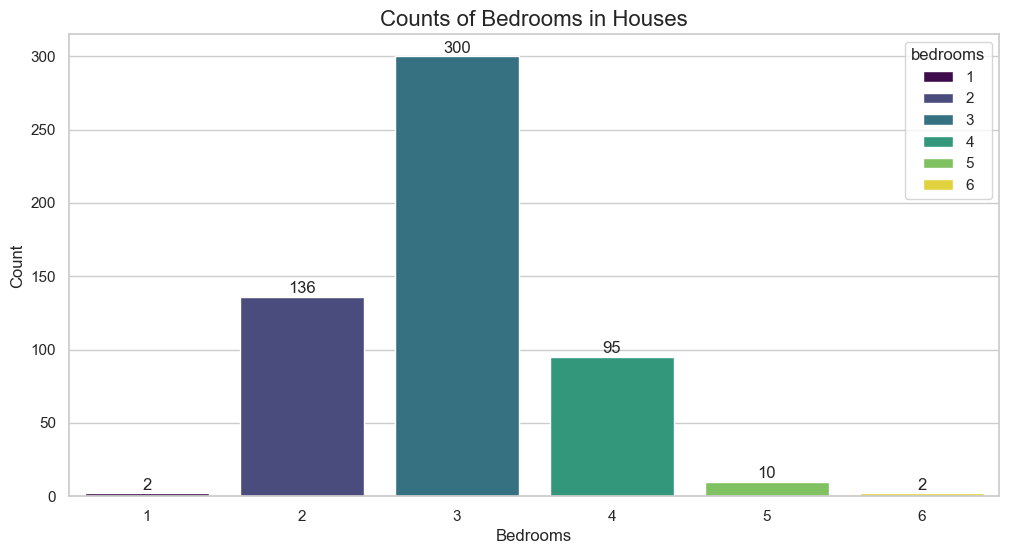

In [431]:
bedrooms_count = data['bedrooms'].value_counts().reset_index().sort_values(by='bedrooms')
plt.figure(figsize=(12, 6))
sns.barplot(x=bedrooms_count['bedrooms'], y=bedrooms_count['count'], palette='viridis', hue=bedrooms_count['bedrooms'])
for i, count in enumerate(bedrooms_count['count']):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
plt.title("Counts of Bedrooms in Houses", fontsize=16)
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

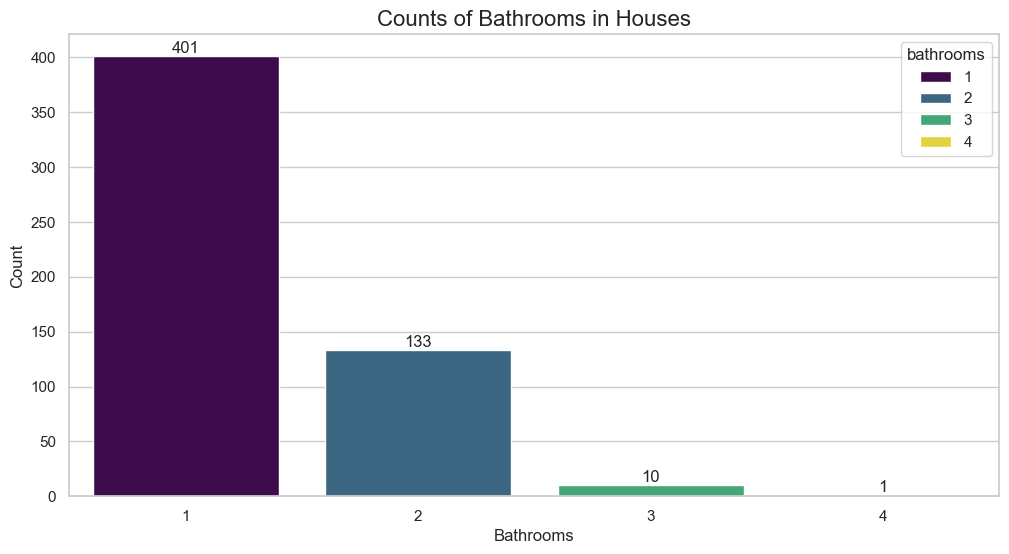

In [432]:
bathrooms_count = data['bathrooms'].value_counts().reset_index().sort_values(by='bathrooms')
plt.figure(figsize=(12, 6))
sns.barplot(x=bathrooms_count['bathrooms'], y=bathrooms_count['count'], palette='viridis', hue=bathrooms_count['bathrooms'])
for i, count in enumerate(bathrooms_count['count']):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
plt.title("Counts of Bathrooms in Houses", fontsize=16)
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.show()

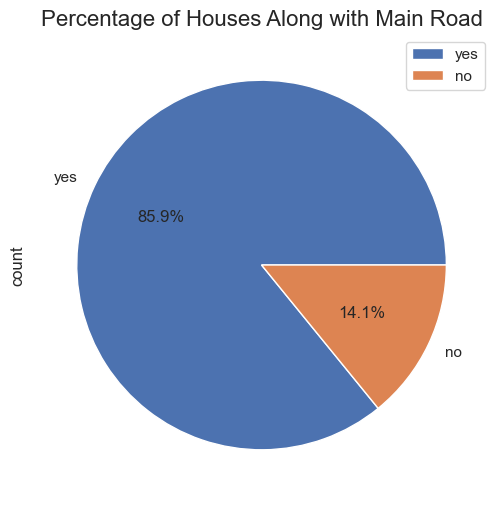

In [433]:
plt.figure(figsize=(12, 6))
data['mainroad'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Percentage of Houses Along with Main Road", fontsize=16)
plt.legend()
plt.show()

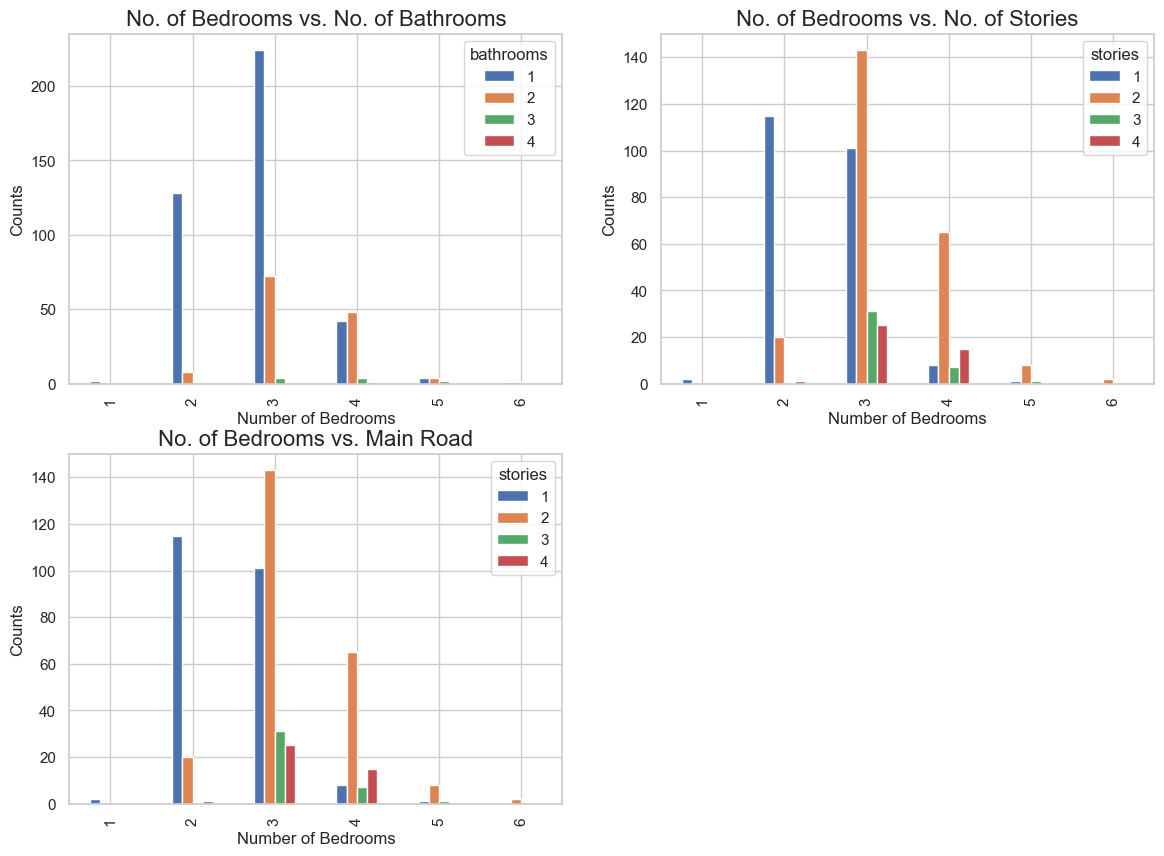

In [435]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
bedrooms_bathrooms = pd.crosstab(data['bedrooms'], data['bathrooms'])
bedrooms_bathrooms.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("No. of Bedrooms vs. No. of Bathrooms", fontsize=16)
axes[0, 0].set_xlabel("Number of Bedrooms")
axes[0, 0].set_ylabel("Counts")

bedrooms_stories = pd.crosstab(data['bedrooms'], data['stories'])
bedrooms_stories.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("No. of Bedrooms vs. No. of Stories", fontsize=16)
axes[0, 1].set_xlabel("Number of Bedrooms")
axes[0, 1].set_ylabel("Counts")

bedrooms_mainroad = pd.crosstab(data['bedrooms'], data['mainroad'])
bedrooms_stories.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("No. of Bedrooms vs. Main Road", fontsize=16)
axes[1, 0].set_xlabel("Number of Bedrooms")
axes[1, 0].set_ylabel("Counts")

axes[1, 1].axis('off')

plt.show()

# <b><center><i> Data Cleaning

#### Handle outliers:

In [442]:
def remove_outliers(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [445]:
numerical_features = data.select_dtypes(exclude='object').columns

In [446]:
data_copy = data.copy()

In [451]:
data_cleaned = remove_outliers(data_copy, 'price')

In [453]:
data_cleaned = remove_outliers(data_copy, 'area')

In [455]:
data_cleaned.shape

(533, 13)

In [457]:
data.shape

(545, 13)

# <b><center><i>Feature Engineering

In [460]:
data_cleaned.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000


In [462]:
encoder_columns = data_cleaned.select_dtypes(include='object').columns
encoder_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [464]:
le = LabelEncoder()
for col in encoder_columns:
    data_cleaned[col] = le.fit_transform(data_cleaned[col])

C:\Users\muham\AppData\Local\Temp\ipykernel_3428\1741165063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
C:\Users\muham\AppData\Local\Temp\ipykernel_3428\1741165063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
C:\Users\muham\AppData\Local\Temp\ipykernel_3428\1741165063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [466]:
data_cleaned.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,0,0,1,2,1,0,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,0,12250000


In [532]:
scaler = MinMaxScaler()

In [534]:
X = data_cleaned.drop(columns='price')
y = data_cleaned['price']

In [536]:
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# <b><center><i>Model Building

In [539]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=42)

In [541]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [543]:
y_predicted = lr_model.predict(X_test)

In [545]:
r2 = r2_score(y_pred=y_predicted, y_true=y_test)
print("Linear Regression R2 Score: ", r2)

Linear Regression R2 Score:  0.6216997998902837


In [547]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_predicted)
mse = mean_squared_error(y_true=y_test, y_pred=y_predicted)

In [549]:
mae, mse

(0.07633336027105964, 0.012248992985185673)

In [555]:
def tune_regression_model(X, y, model, param_grid, test_size=0.2, random_state=42, cv=5, scoring='neg_mean_squared_error'):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scoring)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    metrics = {
        'Best Parameters': best_params,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error': mae,
        'R-squared': r2,
        'Mean Absolute Percentage Error': mape
    }
    
    return best_model, metrics

In [ ]:
lasso = Lasso()
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge
ridge = Ridge()
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# ElasticNet
elastic_net = ElasticNet()
elastic_net_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

# DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)
random_forest_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# SVR
svr = SVR()
svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Tuning and evaluating models
models = {
    'Lasso': (lasso, lasso_param_grid),
    'Ridge': (ridge, ridge_param_grid),
    'ElasticNet': (elastic_net, elastic_net_param_grid),
    'DecisionTree': (decision_tree, decision_tree_param_grid),
    'RandomForest': (random_forest, random_forest_param_grid),
    'SVR': (svr, svr_param_grid)
}

for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")
    best_model, metrics = tune_regression_model(X, y, model, param_grid)
    print(f"{model_name} Metrics:")
    print(metrics)
    print("-" * 50)

Tuning Lasso...
Lasso Metrics:
{'Best Parameters': {'alpha': 100}, 'Mean Squared Error': 1807535865666.696, 'Root Mean Squared Error': 1344446.3044936736, 'Mean Absolute Error': 926079.8755366855, 'R-squared': 0.620651816638919, 'Mean Absolute Percentage Error': 19.559680348709346}
--------------------------------------------------
Tuning Ridge...
Ridge Metrics:
{'Best Parameters': {'alpha': 1}, 'Mean Squared Error': 1812032063229.5073, 'Root Mean Squared Error': 1346117.403211736, 'Mean Absolute Error': 926209.3993653795, 'R-squared': 0.6197081980862349, 'Mean Absolute Percentage Error': 19.55819363293107}
--------------------------------------------------
Tuning ElasticNet...
ElasticNet Metrics:
{'Best Parameters': {'alpha': 0.1, 'l1_ratio': 0.9}, 'Mean Squared Error': 1827500938437.9036, 'Root Mean Squared Error': 1351850.9305533296, 'Mean Absolute Error': 927067.9260569477, 'R-squared': 0.6164617398441573, 'Mean Absolute Percentage Error': 19.562558226257167}
----------------------